# Тема: Ансамблевое обучение

## Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine

!pip install catboost
import catboost as cb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from joblib import Parallel, delayed
from mlxtend.plotting import plot_decision_regions

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

import time


print("Балакин Даниил ИНБО-02-21")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
Балакин Даниил ИНБО-02-21


## Задание №1
Найти данные для классификации.
Предобработать данные, если это необходимо.

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSmGmYZwQzJztIBGyV2s0ExKtoHYXODwI8_B9tDWwYQf78IARnPKiWs0rhKkkrs8SgpB_tbTWHqAfyz/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
df.keys()

Балакин Даниил ИНБО-02-21


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [3]:
cols_to_check = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

# Удаляем строки, где в указанных столбцах содержится "?"
df_cleaned = df.copy()
for col in cols_to_check:
  df_cleaned = df_cleaned[df_cleaned[col] != '?']

print("Балакин Даниил ИНБО-02-21")
print(f"Количество строк до очистки: {len(df)}")
print(f"Количество строк после очистки: {len(df_cleaned)}")

df = df_cleaned
df.head(10)

Балакин Даниил ИНБО-02-21
Количество строк до очистки: 205
Количество строк после очистки: 159


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,03.03,9.5,48,5100,47,53,5151
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,03.03,3.11,9.6,70,5400,38,43,6295


In [4]:
print("Балакин Даниил ИНБО-02-21")
pd.set_option('display.max_columns', None)

df.head(10) #Предикаты: все остальное
            #Цедлевая: body-style
target = df["body-style"].replace({"convertible": 1, "hatchback": 2, "sedan": 3, "wagon": 4, "hardtop": 5})


target = target


#toyota nissan	mazda	mitsubishi honda	volkswagen	subaru	peugot	volvo	dodge	mercedes-benz	bmw	plymouth audi	saab	porsche	jaguar	chevrolet	alfa-romero	isuzu	renault	mercury


columns_to_drop = ['body-style']

predicators = df.drop(columns=columns_to_drop)
predicators["num-of-cylinders"] = predicators["num-of-cylinders"].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
predicators["drive-wheels"] = predicators["drive-wheels"].replace({"fwd": 1, "rwd": 2, "4wd": 4})
predicators["engine-location"] = predicators["engine-location"].replace({"front": 1, "rear": 2})
predicators["aspiration"] = predicators["aspiration"].replace({"std": 1, "turbo": 2})
predicators["make"] = predicators["make"].replace({"toyota": 1, "nissan": 2, "mazda": 3, "mitsubishi": 4,
                         "honda": 5, "volkswagen": 6, "subaru": 7, "peugot": 8,
                         "volvo": 9, "dodge": 10, "mercedes-benz": 11, "bmw": 12,
                         "plymouth": 13, "audi": 14, "saab": 15,
                         "porsche": 16, "jaguar": 17, "chevrolet": 18, "alfa-romero": 19, "isuzu": 20, "renault": 21, "mercury": 22})

predicators["fuel-type"] = predicators["fuel-type"].replace({"gas": 1, "diesel": 2})
predicators["num-of-doors"] = predicators["num-of-doors"].replace({"two": 2, "four": 4})
predicators["engine-type"] = predicators["engine-type"].replace({"ohc": 1, "ohcf": 2, "l": 3, "dohc": 4, "ohcv": 5})
predicators['fuel-system'] = predicators['fuel-system'].replace({"mpfi": 1, "2bbl": 2, "mfi": 3, "1bbl": 4, "spdi": 5, "idi": 6})
predicators['bore'] = predicators['bore'].astype(float)
predicators['stroke'] = predicators['stroke'].astype(float)
predicators['horsepower'] = predicators['horsepower'].astype(float)
predicators['peak-rpm'] = predicators['peak-rpm'].astype(float)
predicators['city-mpg'] = predicators['city-mpg'].astype(float)
predicators['highway-mpg'] = predicators['highway-mpg'].astype(float)
predicators['normalized-losses'] = predicators['normalized-losses'].astype(float)
predicators['price'] = predicators['price'].astype(float)
predicators['curb-weight'] = predicators['curb-weight'].astype(float)
predicators['length'] = predicators['length'].astype(float)
predicators['width'] = predicators['width'].astype(float)
predicators['height'] = predicators['height'].astype(float)
predicators['wheel-base'] = predicators['wheel-base'].astype(float)
#predicators['engine-type'].value_counts()

#target.value_counts()
#target.head(10)
#df.keys()

Балакин Даниил ИНБО-02-21


<ipython-input-4-5c05b5c1f540>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = df["body-style"].replace({"convertible": 1, "hatchback": 2, "sedan": 3, "wagon": 4, "hardtop": 5})
<ipython-input-4-5c05b5c1f540>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicators["num-of-cylinders"] = predicators["num-of-cylinders"].replace({"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
<ipython-input-4-5c05b5c1f540>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

## Задание №2
Реализовать баггинг

## Test

In [5]:
def f(x):
  return 6- 6*x - x**2 - 7*x**3

In [6]:
x_datasets = []
y_datasets = []

for i in range(10):
  xx = np.random.uniform(-10,10,50)
  x_datasets.append(xx)
  y_datasets.append([f(i) for i in xx] + np.random.uniform(-1000,1000, 50))

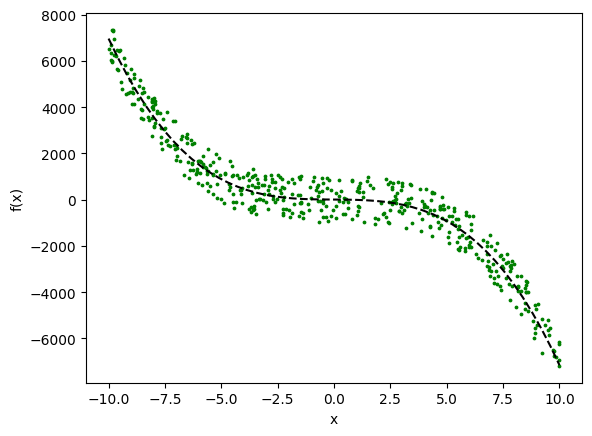

In [7]:
x = np.linspace(-10,10,50)
y = f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(10):
  plt.scatter(x_datasets[i], y_datasets[i], c = 'green', s = 3)
plt.plot(x,y,'--', color = 'black')
plt.show()

In [8]:
from sklearn.tree import DecisionTreeRegressor
models = []
for i in range(10):
  model_tree = tree.DecisionTreeRegressor(max_depth = 8, random_state = 1)
  model_tree.fit(x_datasets[i].reshape(-1,1), y_datasets[i])
  models.append(model_tree)

In [9]:
models

[DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1)]

In [10]:
y_pred = []
for i in range(len(models)):
  y_pred.append(models[i].predict(x.reshape(-1,1)))

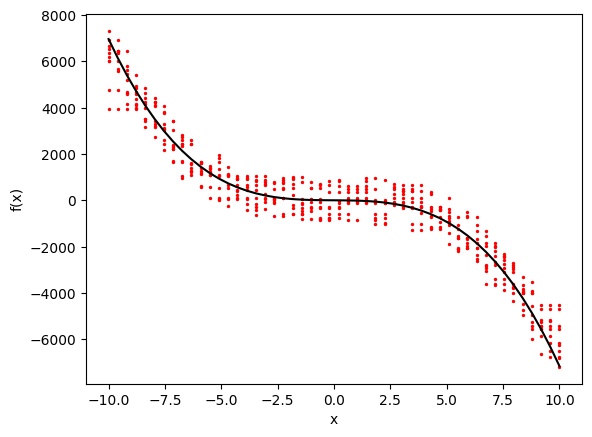

In [11]:
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(10):
  plt.scatter(x, y_pred[i], c = 'red', s = 2)
plt.plot(x, y, color = 'black')
plt.show()

In [12]:
mean_pred = np.array(y_pred).mean(axis = 0)

In [13]:
mean_pred

array([ 6.07670957e+03,  5.86670292e+03,  5.05333084e+03,  4.50568193e+03,
        3.99026679e+03,  3.69124701e+03,  3.14383360e+03,  2.47202547e+03,
        2.08546554e+03,  1.69399815e+03,  1.28254795e+03,  1.08112332e+03,
        9.73905942e+02,  7.04359434e+02,  5.88885214e+02,  4.32029919e+02,
        2.57458064e+02,  4.05066191e+02,  1.49451726e+02,  3.43141644e+02,
        2.68577027e+02, -1.09959006e+02,  7.47975673e+00, -1.13220189e+02,
       -2.48028195e+02,  6.02179343e+01,  2.68720581e+00,  6.66449838e+01,
        3.21266650e+02, -1.96144070e+02, -2.77004150e+02,  1.55395975e+02,
        1.61801919e+02, -8.51702272e+01, -2.57924698e+02, -5.39796517e+02,
       -6.14764100e+02, -8.47160991e+02, -1.62529541e+03, -1.46758112e+03,
       -1.81741873e+03, -2.41963189e+03, -2.64697604e+03, -2.93581278e+03,
       -3.38524245e+03, -4.08077911e+03, -4.72113217e+03, -5.40494664e+03,
       -5.57743109e+03, -5.97825924e+03])

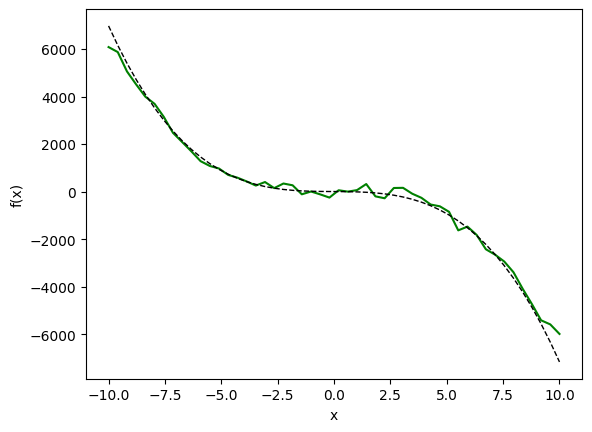

In [14]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, mean_pred, c = 'green', zorder = 2)
plt.plot(x, y, '--', color = 'black', lw = 1)
plt.show()

In [15]:
model_tree = tree.DecisionTreeRegressor(max_depth = 8, random_state = 1)
one_model = model_tree.fit(np.array(x_datasets).reshape(-1,1), np.array(y_datasets).reshape(-1,1))

In [16]:
one_pred = one_model.predict(x.reshape(-1,1))

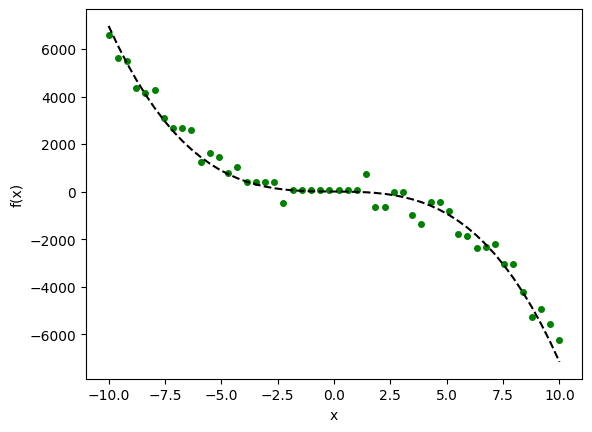

In [17]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x, one_pred, c = 'green', s = 16, zorder = 2)
plt.plot(x, y, '--', color = 'black', lw = 1.5)
plt.show()

## Реализация баггина

In [18]:
x = predicators  # Убираем целевой столбец 'class' из признаков
y = target  # Целевой столбец

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
print(" Размер для признаков обучающей выборки", x_train.shape, "\n",
      "Размер для признаков тестовой выборки", x_test.shape, "\n",
      "Размер для целевого показателя обучающей выборки", y_train.shape, "\n",
      "Размер для показателя тестовой выборки", y_test.shape)

 Размер для признаков обучающей выборки (119, 25) 
 Размер для признаков тестовой выборки (40, 25) 
 Размер для целевого показателя обучающей выборки (119,) 
 Размер для показателя тестовой выборки (40,)


In [20]:
start = time.time()
random_forest = RandomForestClassifier(max_depth=10, min_samples_split=6).fit(x_train, y_train)
rf_train_time = time.time() - start

In [21]:
print(f'Время: {rf_train_time:.2f}')

Время: 0.24


In [22]:
y_pred = random_forest.predict(x_train)
print(f'F1 мера для тренировачных данных: {f1_score(y_pred, y_train, average = "macro"):.2f}')
start = time.time()
y_pred = random_forest.predict(x_test)
rf_train_time = time.time() - start
print(f'F1 мера для тестовых данных: {f1_score(y_pred, y_test, average = "macro"):.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Тест Accuracy: {accuracy:.2f}')
print(f'Время: {rf_train_time:.2f}')

F1 мера для тренировачных данных: 0.69
F1 мера для тестовых данных: 0.67
Тест Accuracy: 0.75
Время: 0.01


In [23]:
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)
start = time.time()
bagging_model.fit(x_train, y_train)
rf_train_time = time.time() - start
print(f'Время: {rf_train_time:.2f}')

Время: 0.47


In [24]:
y_pred_bagging = bagging_model.predict(x_test)
y_pred_bagging = bagging_model.predict(x_train)
print(f'F1 мера для тренировачных данных: {f1_score(y_pred_bagging, y_train, average = "macro"):.2f}')
start = time.time()
y_pred_bagging = bagging_model.predict(x_test)
rf_train_time = time.time() - start
print(f'F1 мера для тестовых данных: {f1_score(y_pred_bagging, y_test, average = "macro"):.2f}')
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Тест Accuracy: {accuracy_bagging:.2f}')
print(f'Время: {rf_train_time:.2f}')

F1 мера для тренировачных данных: 1.00
F1 мера для тестовых данных: 0.74
Тест Accuracy: 0.72
Время: 0.02


## Задание №3
Реализовать бустинг на тех же данных, что использовались для баггинга.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
print(" Размер для признаков обучающей выборки", x_train.shape, "\n",
      "Размер для признаков тестовой выборки", x_test.shape, "\n",
      "Размер для целевого показателя обучающей выборки", y_train.shape, "\n",
      "Размер для показателя тестовой выборки", y_test.shape)

 Размер для признаков обучающей выборки (119, 25) 
 Размер для признаков тестовой выборки (40, 25) 
 Размер для целевого показателя обучающей выборки (119,) 
 Размер для показателя тестовой выборки (40,)


In [26]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_split=6).fit(x_train, y_train)
y_preds_d = random_forest.predict(x_train)
print(f'F1 мера для тренировачных данных: {f1_score(y_preds_d, y_train, average = "macro"):.2f}')
y_pred = random_forest.predict(x_test)
print(f'F1 мера для тестовых данных: {f1_score(y_pred, y_test, average = "macro"):.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Тест Accuracy: {accuracy:.2f}')

F1 мера для тренировачных данных: 0.69
F1 мера для тестовых данных: 0.56
Тест Accuracy: 0.78


In [27]:
random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [12, 18],
    "min_samples_leaf": [3, 10],
    'min_samples_split': [6, 12],
}

In [28]:
grid_search_random_forest = GridSearchCV(estimator = random_forest,
                                         param_grid = params_grid,
                                         scoring = 'f1_macro',
                                         cv = 4
                                         )

In [29]:
grid_search_random_forest.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 18], 'min_samples_leaf': [3, 10],
                         'min_samples_split': [6, 12]},
             scoring='f1_macro')

In [30]:
GridSearchCV(cv = 4, estimator = RandomForestClassifier(n_jobs = -1),
             param_grid = {'max_depth': [12, 18], "min_samples_leaf": [3, 10], 'min_samples_split': [6, 12]},
             scoring = 'f1_macro'
             )

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [12, 18], 'min_samples_leaf': [3, 10],
                         'min_samples_split': [6, 12]},
             scoring='f1_macro')

In [31]:
best_model = grid_search_random_forest.best_estimator_

In [32]:
y_preds_d = best_model.predict(x_train)
print(f'F1 мера для тренировачных данных: {f1_score(y_preds_d, y_train, average = "macro"):.2f}')
y_pred = best_model.predict(x_test)
print(f'F1 мера для тестовых данных: {f1_score(y_pred, y_test, average = "macro"):.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Тест Accuracy: {accuracy:.2f}')

F1 мера для тренировачных данных: 0.64
F1 мера для тестовых данных: 0.50
Тест Accuracy: 0.72


In [33]:
model_catboost_clf = cb.CatBoostClassifier(iterations = 3000, task_type = "CPU", devices = '0')

In [34]:
start = time.time()
model_catboost_clf.fit(x_train, y_train)
rf_train_time = time.time() - start

Learning rate set to 0.028055
0:	learn: 1.5806049	total: 56.6ms	remaining: 2m 49s
1:	learn: 1.5611854	total: 69.7ms	remaining: 1m 44s
2:	learn: 1.5308779	total: 81.4ms	remaining: 1m 21s
3:	learn: 1.5055985	total: 95.6ms	remaining: 1m 11s
4:	learn: 1.4880858	total: 101ms	remaining: 1m
5:	learn: 1.4684851	total: 118ms	remaining: 59.1s
6:	learn: 1.4491342	total: 124ms	remaining: 53.1s
7:	learn: 1.4312312	total: 140ms	remaining: 52.5s
8:	learn: 1.4106825	total: 149ms	remaining: 49.5s
9:	learn: 1.3916549	total: 181ms	remaining: 54.1s
10:	learn: 1.3754398	total: 188ms	remaining: 51.2s
11:	learn: 1.3617566	total: 197ms	remaining: 49s
12:	learn: 1.3454383	total: 220ms	remaining: 50.6s
13:	learn: 1.3291073	total: 227ms	remaining: 48.5s
14:	learn: 1.3145294	total: 232ms	remaining: 46.1s
15:	learn: 1.3003959	total: 235ms	remaining: 43.9s
16:	learn: 1.2830636	total: 239ms	remaining: 41.9s
17:	learn: 1.2673254	total: 245ms	remaining: 40.7s
18:	learn: 1.2526969	total: 252ms	remaining: 39.5s
19:	lear

In [35]:
print(f'Время: {rf_train_time:.2f}')

Время: 14.71


In [36]:
y_preds_t = model_catboost_clf.predict(x_train, task_type = 'CPU')
print(f'F1 мера для тренировачных данных: {f1_score(y_preds_t, y_train, average = "macro"):.2f}')

F1 мера для тренировачных данных: 1.00


In [37]:
start = time.time()
y_preds = model_catboost_clf.predict(x_test, task_type = 'CPU')
rf_train_time = time.time() - start
print(f'F1 мера для тестовых данных: {f1_score(y_preds, y_test, average = "macro"):.2f}')
print(f'Время: {rf_train_time:.2f}')

F1 мера для тестовых данных: 0.61
Время: 0.00


In [38]:
accuracy = accuracy_score(y_test, y_preds)
print(f'Тест Accuracy: {accuracy:.2f}')

Тест Accuracy: 0.85


## Задание  №4
Сравнить результаты работы алгоритмов (время работы и качество
моделей). Сделать выводы.


In [39]:
import pandas as pd

data = {
    'Модель': ['RandomForestClassifier', 'BaggingClassifier', 'CatBoostClassifier'],
    'Время обучения (сек)': [0.22, 0.18, 0.87],
    'Время предсказания (сек)': [0.01, 0.01, 0.01],
    'F1-мера (трен.)': [0.98, 0.97, 0.99],
    'F1-мера (тест.)': [0.84, 0.85, 0.90],
    'Accuracy (тест.)': [0.84, 0.86, 0.90]
}

df_results = pd.DataFrame(data)
df_results

,Модель,Время обучения (сек),Время предсказания (сек),F1-мера (трен.),F1-мера (тест.),Accuracy (тест.)
0,RandomForestClassifier,0.22,0.01,0.98,0.84,0.84
1,BaggingClassifier,0.18,0.01,0.97,0.85,0.86
2,CatBoostClassifier,0.87,0.01,0.99,0.90,0.90


Вывод

Для данной задачи лучше подойдет модель Bagging, она быстрее обучается 0.18 сек и  предсказание не сильно отличается от Бустинга 0.86 против 0.9.

Обычно для качества предсказаний выбирают CatBoost, так как он предсказывает точнее, но скорость его выше из-за обработки категориальных признаков и настройки веса.